### <b style="color: #abcdef">02.컴퓨터 비전에 쓰이는 ML 모델</b>

#### <b style="color: #fedcba">5-Flowers</b>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2024-01-30 15:00:40.923567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 15:00:40.923596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 15:00:40.924154: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 15:00:40.928038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 15:00:41.456387: W tensorflow/compiler/tf2

In [2]:
# IMG_HEIGHT, IMG_WIDTH = 256, 128
IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 224, 224, 3

def read_and_decode(filename, reshape_dims):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32) # uint8(0~255) 타입을 float32(0~1) 타입으로 변환
    
    # 종횡비 유지하지 않음
    return tf.image.resize(img, reshape_dims) 

> <b style="color: #aa4455">Tensor</b>  
>  
> 임의의 차원 배열(n차원)  
> tensorflow 혹은 pytorch 의 tensor는  
> GPU 가속을 이용할 수 있도록 하는 차이가 있음

In [3]:
def show_image(filename):
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    plt.imshow(img.numpy())

2024-01-22 11:31:06.650115: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-22 11:31:06.650134: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-22 11:31:06.650139: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-22 11:31:06.650389: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-22 11:31:06.650409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-01-22 11:31:06.720408: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrie

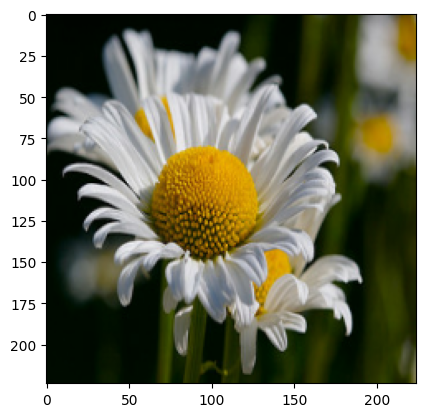

In [4]:
# img_url = 'https://storage.googleapis.com/practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg'
img_url = 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg'
show_image(img_url)

In [5]:
# tulips = tf.io.gfile.glob('gs://cloud-ml-data/img/flower_photos/tulips/*.jpg')
# 로드 안되는데 ㅅㅂㄹㅁ

def show_images(img_list, col_size=5):
    row_size = len(img_list) // col_size
    plt.figure(figsize=(15, 15))
    for i, img in enumerate(img_list):
        plt.subplot(row_size, col_size, i+1)
        plt.imshow(img.numpy())
    plt.show()
    
# show_images(tulips)

#### <b style="color: #ff7c7a">로드 안된다 주소가 문제야 뭐야</b>
---

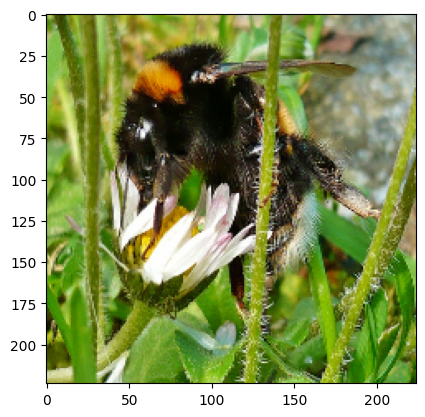

In [6]:
import os

path_data = 'data/5-flowers'
img_url = os.path.join(path_data, 'train', 'daisy', '2481823240_eab0d86921.jpg')
show_image(img_url)

In [7]:
tulips = tf.io.gfile.glob(os.path.join(path_data, 'train', 'tulip', '*.jpg'))
print(f'length: {len(tulips)}')

length: 607


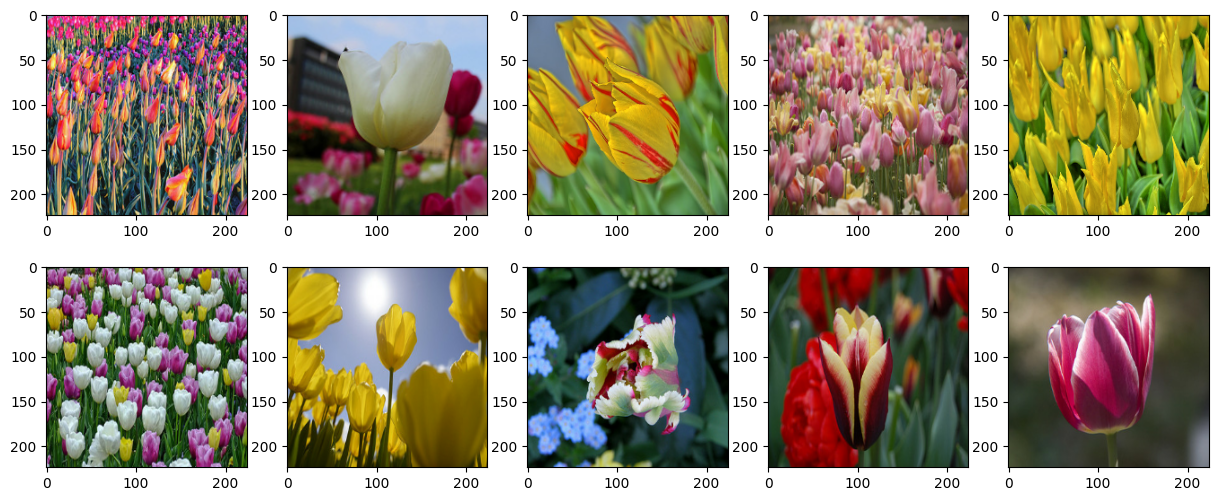

In [8]:
def show_images(path_list, col_size=5):
    row_size = len(path_list) // col_size
    plt.figure(figsize=(15, 3*row_size))
    for i, path in enumerate(path_list):
        plt.subplot(row_size, col_size, i+1)
        plt.imshow(read_and_decode(path, [IMG_HEIGHT, IMG_WIDTH]).numpy())
    plt.show()
    
show_images(tulips[:10])

#### <b style="color: #fedcba">데이터셋</b>

In [9]:
path_train_images = tf.io.gfile.glob(os.path.join(path_data, 'train', '*', '*.jpg'))
path_test_images = tf.io.gfile.glob(os.path.join(path_data, 'test', '*.jpg'))

data_size = len(path_train_images)
test_size = len(path_test_images)
print(f'train size: {data_size}, test size: {test_size}')

train size: 2746, test size: 924


In [10]:
# basename = tf.strings.regex_replace(filename, path_data, '')
train_labels = [path.split('/')[-2] for path in path_train_images]
train_labels[:5]

['rose', 'rose', 'rose', 'rose', 'rose']

In [11]:
# path_train_images = np.array(path_train_images)
# eval_size = .3
# eval_idxes = np.random.choice(data_size, int(data_size*eval_size), replace=False)

# path_eval_images = path_train_images[eval_idxes]
# path_train_images = np.delete(path_train_images, eval_idxes)

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(path_train_images, train_labels, test_size=0.3, random_state=0)

In [12]:
print(f'train size: {len(X_train)}, eval size: {len(X_test)}')

train size: 1922, eval size: 824


In [13]:
# save X_train, X_test, y_train, y_test to csv
import pandas as pd

df_train = pd.DataFrame({'path': X_train, 'label': y_train})
df_test = pd.DataFrame({'path': X_test, 'label': y_test})

df_train.to_csv(os.path.join(path_data, 'train.csv'), index=False)
df_test.to_csv(os.path.join(path_data, 'test.csv'), index=False)

In [14]:
def decode_csv(csv_row):
    record_defaults = ['path', 'flower'] # 배열의 의미는 모르겠다 ㅅㅂㄹㅁ
    path_file, label = tf.io.decode_csv(csv_row, record_defaults)
    
    img = read_and_decode(path_file, [IMG_HEIGHT, IMG_WIDTH])
    return img, label

In [15]:
dataset = tf.data.TextLineDataset(os.path.join(path_data, 'train.csv')).skip(1).map(decode_csv)

In [16]:
# d = tf.Tensor([
#     [1, 2, 3],
#     [4, 5, 6],
#     [7, 8, 9]
# ], dtype=tf.float32)

d = tf.convert_to_tensor([
    [
        [10, 20, 30],
        [40, 50, 60],
        [70, 80, 90]
    ],
    [
        [11, 21, 31],
        [41, 51, 61],
        [71, 81, 91]
    ],
    [
        [12, 22, 32],
        [42, 52, 62],
        [72, 82, 92]
        ]
], dtype=tf.float32)
tf.math.reduce_mean(d, axis=[1])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[40., 50., 60.],
       [41., 51., 61.],
       [42., 52., 62.]], dtype=float32)>

In [17]:
for img, label in dataset.take(3):
    avg = tf.math.reduce_mean(img, axis=[0, 1])
    print(label, avg)

tf.Tensor(b'tulip', shape=(), dtype=string) tf.Tensor([0.4154113  0.4395073  0.32672074], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.5243376  0.5343812  0.33039194], shape=(3,), dtype=float32)
tf.Tensor(b'sunflower', shape=(), dtype=string) tf.Tensor([0.4118121  0.26885054 0.22225761], shape=(3,), dtype=float32)


#### <b style="color: #fedcba">케라스모델</b>

In [18]:
CLASS_NAMES = np.unique(y_train).tolist()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Dense(len(CLASS_NAMES))
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [19]:
batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
batch_pred = model.predict(batch_image)
pred = batch_pred[0]
pred_label_index = tf.math.argmax(pred)
pred_label = CLASS_NAMES[pred_label_index]

print(f'pred: {pred}, \npred_label_index: {pred_label_index}, \npred_label: {pred_label}')

1/1 [==============================] - 0s 59ms/step
pred: [-0.01564758  0.23358858  0.26942945  0.8237951   0.10719103], 
pred_label_index: 3, 
pred_label: sunflower


2024-01-22 11:31:49.628077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


> #### <b style="color: #fedcba">확률, 오즈, 로짓, 시그모이드, 소프트맥스</b>
> - 확률: 사건의 발생 가능성
> - 오즈: 확률/(1-확률)
> - 로짓: log오즈
> - 시그모이드: 로짓 역함수
> - 소프트맥스: <span style="color: #F93">뭐라는건지...</span>

In [20]:
prob = tf.math.softmax(pred)[pred_label_index]
print(f'probabiliy: {prob}')

probabiliy: 0.32797548174858093


> #### <b style="color: #fedcba">활성화 함수</b>
> #### <b style="color: #fedcba">옵티마이저</b>
> - SGD, Adagrad, Adam, Ftrl
> - Adam WIN (경험적으로)
> #### <b style="color: #fedcba">손실</b>
> - 범주형 교차 엔트로피 (REALLY?) -> categoricalCrossEntropy
> - tf.keras. losses.CategoricalCrossentropy (<span style="color: red">from_logits=False</span>) -> one-hot
> - tf.keras. losses.SparseCategoricalCrossentropy(from_logits=False) -> 희소행렬 (인덱스라거나)
> #### <b style="color: #fedcba">metric</b>
> - accuracy (precision, recall, f1-score, roc-auc)


In [21]:
label.numpy().decode('utf-8')

'sunflower'

In [22]:
for ii, ll in dataset.take(1):
    print(ii.shape, ll.numpy().decode('utf-8'))

(224, 224, 3) tulip


In [23]:
def decode_csv(csv_row):
    record_defaults = ['path', 'label']
    path_file, label = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(path_file, [IMG_HEIGHT, IMG_WIDTH])
    # label = tf.math.equal(CLASS_NAMES, label_string) # ㅅㅂ 검수 뭐하냐
    label = tf.math.equal(CLASS_NAMES, label)
    
    return img, label

### <b style="color: #fedcba">모델학습</b>

In [24]:
# 시발놈이 또 바꾸네
def decode_csv(csv_row):
    record_defaults = ['path', 'label']
    path_file, label = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(path_file, [IMG_HEIGHT, IMG_WIDTH])
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label))
    
    return img, label

In [25]:
train_dataset = tf.data.TextLineDataset(
    os.path.join(path_data, 'train.csv')
).skip(1).map(decode_csv).batch(10)
eval_dataset = tf.data.TextLineDataset(
    os.path.join(path_data, 'test.csv')
).skip(1).map(decode_csv).batch(10)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

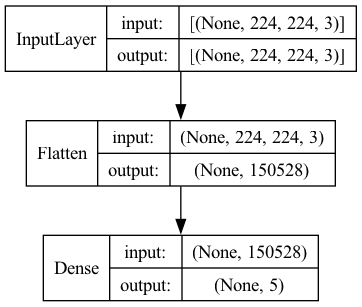

In [27]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 5)                 752645    
                                                                 
Total params: 752645 (2.87 MB)
Trainable params: 752645 (2.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)

Epoch 1/10


2024-01-19 11:17:19.004720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 3s 11ms/step - loss: 18.8019 - accuracy: 0.3273

2024-01-19 11:17:21.975486: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1984204576240609409
2024-01-19 11:17:21.975498: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1125957882214697239
2024-01-19 11:17:21.975503: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7542603603205714187
2024-01-19 11:17:21.975507: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3846500486773282159
2024-01-19 11:17:21.975533: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5988696725480395102
2024-01-19 11:17:21.975536: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 17160202592223133148
2024-01-19 11:17:22.047782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114]

193/193 [==============================] - 4s 16ms/step - loss: 18.8019 - accuracy: 0.3273 - val_loss: 14.4348 - val_accuracy: 0.3107
Epoch 2/10
 12/193 [>.............................] - ETA: 1s - loss: 10.5245 - accuracy: 0.4083

2024-01-19 11:17:22.880796: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13843154074398286553
2024-01-19 11:17:22.880810: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1607049953444542824
2024-01-19 11:17:22.880814: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 17456018693548398050
2024-01-19 11:17:22.880819: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8822534005470406150


193/193 [==============================] - 3s 13ms/step - loss: 12.5875 - accuracy: 0.4142 - val_loss: 17.7663 - val_accuracy: 0.3544
Epoch 3/10
193/193 [==============================] - 3s 14ms/step - loss: 14.6723 - accuracy: 0.4464 - val_loss: 15.3404 - val_accuracy: 0.3483
Epoch 4/10
193/193 [==============================] - 3s 13ms/step - loss: 12.7741 - accuracy: 0.4922 - val_loss: 15.7633 - val_accuracy: 0.3920
Epoch 5/10
193/193 [==============================] - 3s 13ms/step - loss: 9.7880 - accuracy: 0.5520 - val_loss: 10.5913 - val_accuracy: 0.4029
Epoch 6/10
193/193 [==============================] - 3s 13ms/step - loss: 9.9858 - accuracy: 0.5598 - val_loss: 20.3923 - val_accuracy: 0.3568
Epoch 7/10
193/193 [==============================] - 3s 14ms/step - loss: 11.7841 - accuracy: 0.5473 - val_loss: 18.9260 - val_accuracy: 0.3653
Epoch 8/10
193/193 [==============================] - 3s 13ms/step - loss: 13.1279 - accuracy: 0.5499 - val_loss: 23.3962 - val_accuracy: 0.368

keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Axes: >

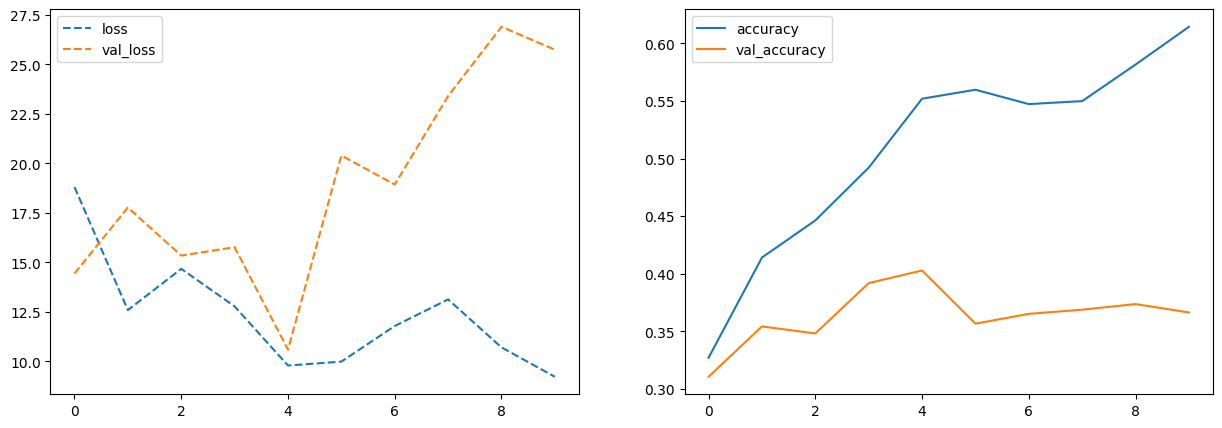

In [46]:
print(f'keys: {history.history.keys()}')
# plt.plot(history.history[['val_loss', 'loss']], ls='dashed')
df_history = pd.DataFrame(history.history)

# plot loss and val_loss on left side. right side is accuracy and val_accuracy
# validation line is dashed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0], ls='dashed')
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])

In [49]:
batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
batch_pred = model.predict(batch_image)
pred = batch_pred[0]
probs = tf.math.softmax(pred)
pred_label_index = tf.math.argmax(pred)
pred_label = CLASS_NAMES[pred_label_index]

print(f'pred: {pred}, \nprobs: {probs}, \npred_label_index: {pred_label_index}, \npred_label: {pred_label}')

1/1 [==============================] - 0s 19ms/step
pred: [4.6386363e-29 1.0000000e+00 0.0000000e+00 8.5168521e-17 4.9632217e-29], 
probs: [0.14884758 0.4046097  0.14884758 0.14884758 0.14884758], 
pred_label_index: 1, 
pred_label: dandelion


1/1 [==============================] - 0s 35ms/step


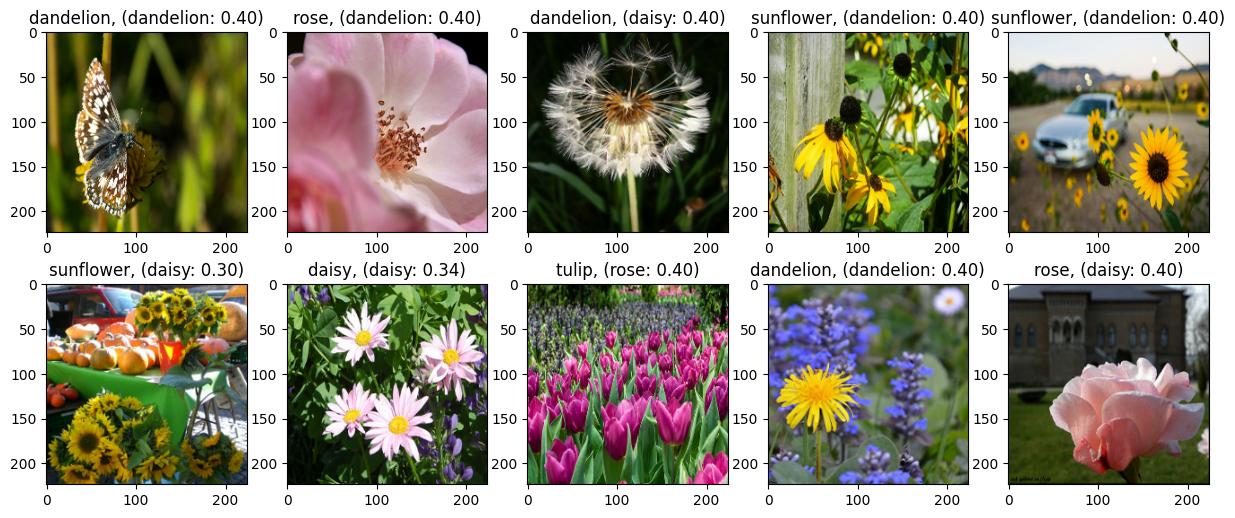

In [66]:
imgs, labels = next(iter(eval_dataset))
preds = model.predict(imgs)
pred_labels = tf.math.argmax(preds, axis=1)
# pred_labels = [CLASS_NAMES[i] for i in pred_labels]

col = 5
row = len(imgs) // col
plt.figure(figsize=(15, 3*row))
for i, (img, label, pred_label) in enumerate(zip(imgs, labels, pred_labels)):
    label_string = CLASS_NAMES[label]
    pred_string = CLASS_NAMES[pred_label]
    probs = tf.math.softmax(preds[i])
    prob = probs[pred_label]
    plt.subplot(row, col, i+1)
    plt.imshow(img.numpy())
    plt.title(f'{label_string}, ({pred_string}: {prob:.2f})')

#### <b style="color: #7e7c7a">회귀인 경우...</b>
- tf.keras.layers.Dense(units=1, activation=None) [손실함수는 MSE같은 회귀용]

### <b style="color: #fedcba">신경망</b>

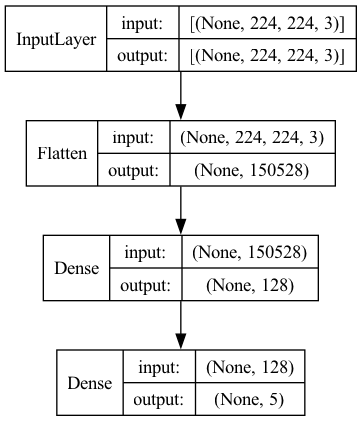

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(128), # <- 은닉층
    tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax'),
])

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

#### <b style="color: #7e7c7a">수학적으로 선형과 같아 의미가 없다(뭔소린지는...)</b>

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(128, activation='relu'), # <- 활성화 함수 추가
    tf.keras.layers.Dense(5, activation='softmax'),
])

#### <b style="color: #7e7c7a">ReLU</b>
- 어쩌고 저쩌고 dead ReLUs 해서 elu 가 해결책인데 계산비용때문에 LeakyReLU를 실무에서 많이 쓴다

In [71]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)

Epoch 1/10


2024-01-22 10:36:42.544421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 7s 31ms/step - loss: 45.6089 - accuracy: 0.2940

2024-01-22 10:36:49.238621: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3617377735740389766
2024-01-22 10:36:49.238636: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8295233638157510793
2024-01-22 10:36:49.238640: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8253515029033835613
2024-01-22 10:36:49.238644: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3278115843848720309
2024-01-22 10:36:49.239255: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5988696725480395102
2024-01-22 10:36:49.239268: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 9850485520472667434
2024-01-22 10:36:49.511656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] 

193/193 [==============================] - 8s 38ms/step - loss: 45.6089 - accuracy: 0.2940 - val_loss: 15.1065 - val_accuracy: 0.3738
Epoch 2/10
  5/193 [..............................] - ETA: 5s - loss: 13.3873 - accuracy: 0.3200

2024-01-22 10:36:50.438425: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2476316977852549213
2024-01-22 10:36:50.438438: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5561438388855565435
2024-01-22 10:36:50.438442: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1861113928741215385
2024-01-22 10:36:50.438448: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8822534005470406150


193/193 [==============================] - 7s 35ms/step - loss: 15.5886 - accuracy: 0.3678 - val_loss: 20.4867 - val_accuracy: 0.3252
Epoch 3/10
193/193 [==============================] - 7s 36ms/step - loss: 12.0689 - accuracy: 0.4261 - val_loss: 16.9900 - val_accuracy: 0.3701
Epoch 4/10
193/193 [==============================] - 6s 33ms/step - loss: 12.5142 - accuracy: 0.4261 - val_loss: 9.5540 - val_accuracy: 0.4114
Epoch 5/10
193/193 [==============================] - 7s 36ms/step - loss: 12.3335 - accuracy: 0.4594 - val_loss: 10.1766 - val_accuracy: 0.3883
Epoch 6/10
193/193 [==============================] - 7s 34ms/step - loss: 12.7403 - accuracy: 0.4532 - val_loss: 23.8832 - val_accuracy: 0.2779
Epoch 7/10
193/193 [==============================] - 7s 36ms/step - loss: 11.1275 - accuracy: 0.4579 - val_loss: 13.8930 - val_accuracy: 0.3859
Epoch 8/10
193/193 [==============================] - 7s 36ms/step - loss: 9.0369 - accuracy: 0.5016 - val_loss: 11.6079 - val_accuracy: 0.359

keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Axes: >

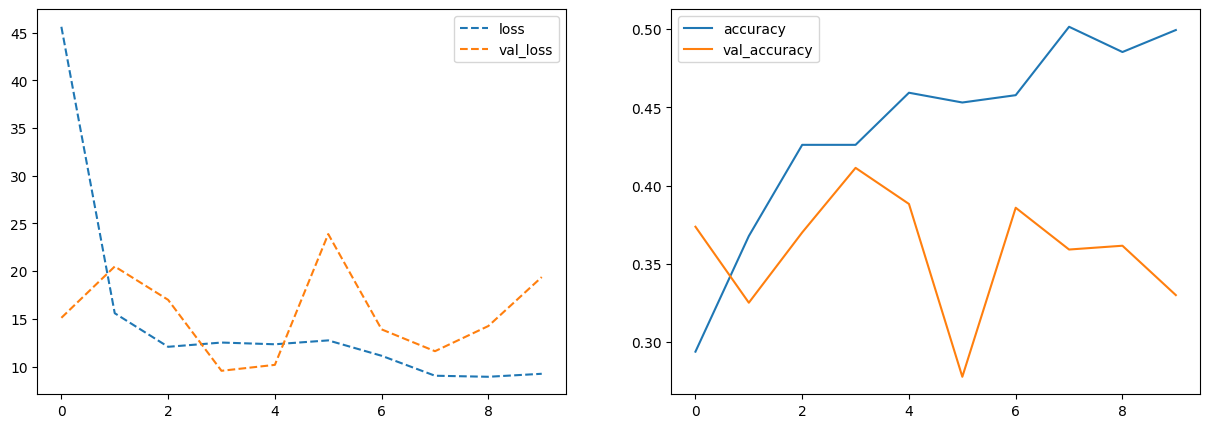

In [72]:
print(f'keys: {history.history.keys()}')
df_history = pd.DataFrame(history.history)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0], ls='dashed')
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])

Epoch 1/10
      2/Unknown - 1s 73ms/step - loss: 11.6929 - accuracy: 0.3000

2024-01-22 10:45:57.479720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 6s 30ms/step - loss: 4.3933 - accuracy: 0.3465

2024-01-22 10:46:03.374402: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3769426539162447892
2024-01-22 10:46:03.374418: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8295233638157510793
2024-01-22 10:46:03.374423: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8253515029033835613
2024-01-22 10:46:03.374428: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3278115843848720309
2024-01-22 10:46:03.374434: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5988696725480395102
2024-01-22 10:46:03.374443: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 9850485520472667434
2024-01-22 10:46:03.425258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] 

193/193 [==============================] - 7s 35ms/step - loss: 4.3933 - accuracy: 0.3465 - val_loss: 1.7586 - val_accuracy: 0.4126
Epoch 2/10
  2/193 [..............................] - ETA: 10s - loss: 0.6681 - accuracy: 0.7500

2024-01-22 10:46:04.205624: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6316244946233869034
2024-01-22 10:46:04.205637: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2476316977852549213
2024-01-22 10:46:04.205640: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5561438388855565435
2024-01-22 10:46:04.205651: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8822534005470406150


193/193 [==============================] - 6s 33ms/step - loss: 1.6320 - accuracy: 0.4443 - val_loss: 2.1802 - val_accuracy: 0.3786
Epoch 3/10
193/193 [==============================] - 6s 33ms/step - loss: 1.4846 - accuracy: 0.4813 - val_loss: 1.9622 - val_accuracy: 0.3847
Epoch 4/10
193/193 [==============================] - 7s 34ms/step - loss: 1.3468 - accuracy: 0.5328 - val_loss: 1.5222 - val_accuracy: 0.4090
Epoch 5/10
193/193 [==============================] - 6s 33ms/step - loss: 1.2242 - accuracy: 0.5780 - val_loss: 1.5480 - val_accuracy: 0.3993
Epoch 6/10
193/193 [==============================] - 6s 33ms/step - loss: 1.1254 - accuracy: 0.6197 - val_loss: 1.5474 - val_accuracy: 0.4066
Epoch 7/10
193/193 [==============================] - 6s 33ms/step - loss: 1.0623 - accuracy: 0.6358 - val_loss: 1.5895 - val_accuracy: 0.3944
Epoch 8/10
193/193 [==============================] - 6s 33ms/step - loss: 1.1150 - accuracy: 0.6254 - val_loss: 2.1160 - val_accuracy: 0.3580
Epoch 9/10

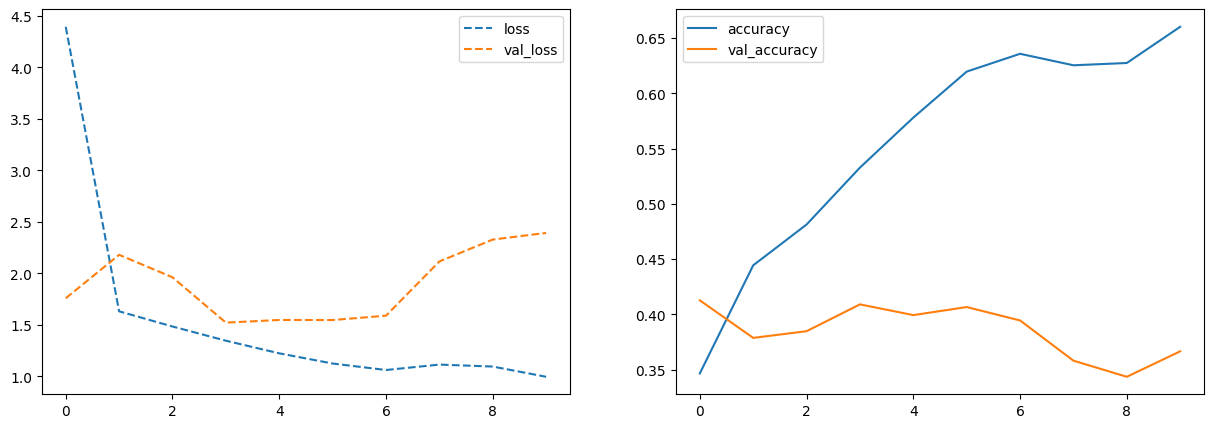

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)
df_history = pd.DataFrame(history.history)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0], ls='dashed')
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])
plt.show()

> #### <b style="color: #58a491">규제</b>
> 간단한 모델은 L1(가중치 -> 0), 과적합 최대 억제는 L2

Epoch 1/10


2024-01-22 10:52:58.731712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 8s 39ms/step - loss: 4.8651 - accuracy: 0.3028

2024-01-22 10:53:06.480613: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 17672305252333873257
2024-01-22 10:53:06.480627: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8295233638157510793
2024-01-22 10:53:06.480631: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 155491837351237205
2024-01-22 10:53:06.480636: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3327632871633235547
2024-01-22 10:53:06.480641: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2264840168626379842
2024-01-22 10:53:06.480645: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 786487688481941192
2024-01-22 10:53:06.577676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] P

193/193 [==============================] - 9s 46ms/step - loss: 4.8651 - accuracy: 0.3028 - val_loss: 2.7893 - val_accuracy: 0.3131
Epoch 2/10
  1/193 [..............................] - ETA: 12s - loss: 0.3524 - accuracy: 1.0000

2024-01-22 10:53:07.751690: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1984204576240609409
2024-01-22 10:53:07.751725: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2476316977852549213
2024-01-22 10:53:07.751730: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 17363551376742955859
2024-01-22 10:53:07.751734: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 4151270790784368709


193/193 [==============================] - 9s 45ms/step - loss: 2.1852 - accuracy: 0.4053 - val_loss: 2.4904 - val_accuracy: 0.3434
Epoch 3/10
193/193 [==============================] - 9s 45ms/step - loss: 1.8564 - accuracy: 0.4422 - val_loss: 1.9045 - val_accuracy: 0.3944
Epoch 4/10
193/193 [==============================] - 8s 44ms/step - loss: 1.6123 - accuracy: 0.4834 - val_loss: 1.7764 - val_accuracy: 0.4090
Epoch 5/10
193/193 [==============================] - 9s 46ms/step - loss: 1.4505 - accuracy: 0.5156 - val_loss: 1.6780 - val_accuracy: 0.4114
Epoch 6/10
193/193 [==============================] - 9s 46ms/step - loss: 1.3692 - accuracy: 0.5239 - val_loss: 1.6399 - val_accuracy: 0.4199
Epoch 7/10
193/193 [==============================] - 9s 45ms/step - loss: 1.3913 - accuracy: 0.5260 - val_loss: 1.6356 - val_accuracy: 0.4163
Epoch 8/10
193/193 [==============================] - 9s 44ms/step - loss: 1.2328 - accuracy: 0.5578 - val_loss: 1.6758 - val_accuracy: 0.3896
Epoch 9/10

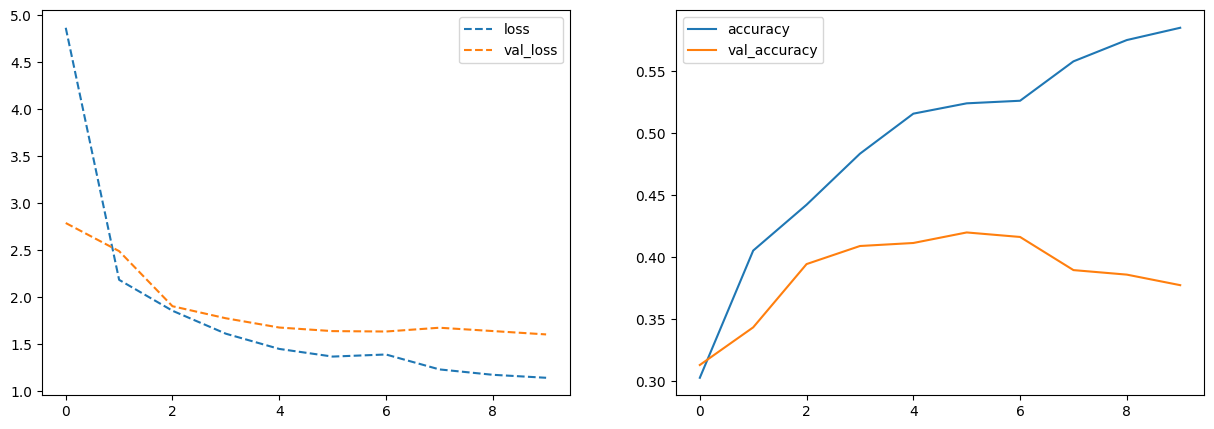

In [74]:
regularizer = tf.keras.regularizers.l1_l2(0, 0.001)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dense(5, activation='softmax', kernel_regularizer=regularizer),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)
df_history = pd.DataFrame(history.history)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0], ls='dashed')
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])
plt.show()

> #### <b style="color: #58a491">Early Stopping</b>
> fit 함수에 callback 전달
> callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)]

In [76]:
regularizer = tf.keras.regularizers.l1_l2(0, 0.001)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dense(5, activation='softmax', kernel_regularizer=regularizer),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)
history = model.fit(
    train_dataset, validation_data=eval_dataset, epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)]
)

Epoch 1/10


2024-01-22 11:00:06.969495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 8s 41ms/step - loss: 9.2879 - accuracy: 0.3288

2024-01-22 11:00:14.985442: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8295233638157510793
2024-01-22 11:00:14.985456: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 155491837351237205
2024-01-22 11:00:14.985461: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3327632871633235547
2024-01-22 11:00:14.985466: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2264840168626379842
2024-01-22 11:00:14.985469: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 786487688481941192
2024-01-22 11:00:14.985473: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3055284438323836728
2024-01-22 11:00:15.086247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Pl

193/193 [==============================] - 10s 50ms/step - loss: 9.2879 - accuracy: 0.3288 - val_loss: 2.0223 - val_accuracy: 0.3653
Epoch 2/10
  3/193 [..............................] - ETA: 7s - loss: 1.2132 - accuracy: 0.7000 

2024-01-22 11:00:16.812457: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1536321992370417745
2024-01-22 11:00:16.812470: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2476316977852549213
2024-01-22 11:00:16.812474: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1984204576240609409
2024-01-22 11:00:16.812478: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 17363551376742955859


193/193 [==============================] - 9s 47ms/step - loss: 1.7055 - accuracy: 0.4344 - val_loss: 1.7953 - val_accuracy: 0.4005
Epoch 3/10
193/193 [==============================] - 9s 47ms/step - loss: 1.5323 - accuracy: 0.4771 - val_loss: 1.7524 - val_accuracy: 0.3859
Epoch 4/10
193/193 [==============================] - 9s 46ms/step - loss: 1.4313 - accuracy: 0.5031 - val_loss: 1.7321 - val_accuracy: 0.3871
Epoch 5/10
193/193 [==============================] - 9s 46ms/step - loss: 1.3527 - accuracy: 0.5323 - val_loss: 1.7023 - val_accuracy: 0.3981
Epoch 6/10
193/193 [==============================] - 9s 45ms/step - loss: 1.2829 - accuracy: 0.5588 - val_loss: 1.6780 - val_accuracy: 0.4090
Epoch 7/10
193/193 [==============================] - 9s 45ms/step - loss: 1.2225 - accuracy: 0.5775 - val_loss: 1.6600 - val_accuracy: 0.4150
Epoch 8/10
193/193 [==============================] - 9s 47ms/step - loss: 1.1717 - accuracy: 0.5999 - val_loss: 1.6439 - val_accuracy: 0.4150
Epoch 9/10

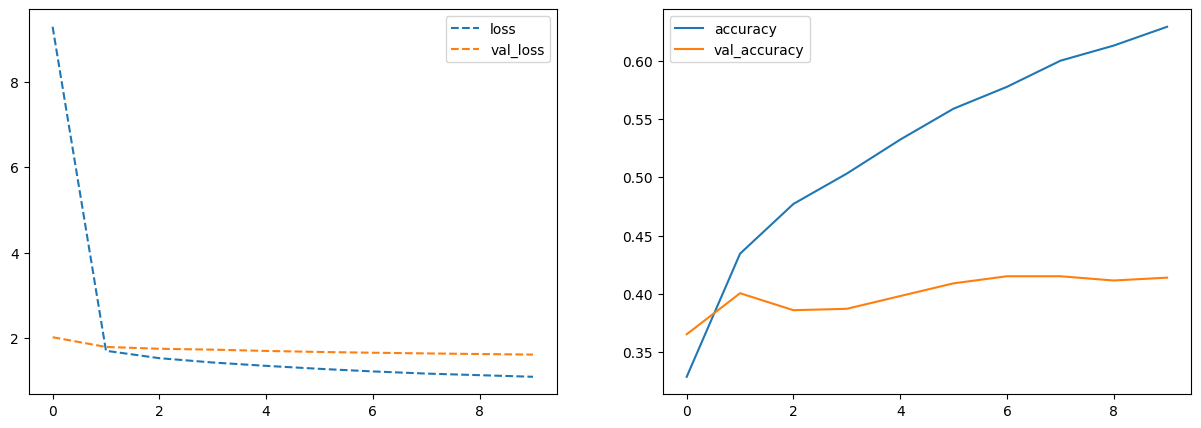

In [77]:
df_history = pd.DataFrame(history.history)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0], ls='dashed')
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])
plt.show()

> #### <b style="color: #58a491">튜닝</b>
> 은닉 유닛수, 학습률, L2 규제 등...

In [78]:
!pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [69]:
import kerastuner as kt

def build_model(hp):
    lrate = hp.Float('lrate', 1e-4, 1e-1, sampling='log')
    l1 = 0
    l2 = hp.Choice('l2', values=[0.0, 1e-1, 1e-2, 1e-3, 1e-4])
    num_hidden = hp.Int('num_hidden', 32, 256, 32)
    
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
        tf.keras.layers.Dense(num_hidden, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(5, activation='softmax', kernel_regularizer=regularizer),
    ])
      
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy'],
    )
    
    return model

In [71]:
# vision 문제에 베이즈 최적화(Bayesian Optimization)이 잘된다고 함
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective('val_accuracy', 'max'),
    max_trials=10,
    num_initial_points=2,
    overwrite=False, # True로 하면 기존에 학습한 것을 무시하고 다시 학습함
)

tuner.search(
    train_dataset, validation_data=eval_dataset,
    epochs=5,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)]
)

Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.20873786509037018

Best val_accuracy So Far: 0.36043688654899597
Total elapsed time: 00h 20m 08s


In [73]:
topN = 2
params = tuner.get_best_hyperparameters(topN)
models = tuner.get_best_models(topN)
for x in range(topN):
    print(params[x].values)
    print(models[x].summary())

{'lrate': 0.00028388386763238534, 'l2': 0.1, 'num_hidden': 128}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 19268357 (73.50 MB)
Trainable params: 19268357 (73.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
{'lrate': 0.016536037279401006, 'l2': 0.001, 'num_hidden': 256}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Para

In [75]:
def evaluate_model(model, dataset):
    loss, accuracy = model.evaluate(dataset)
    print(f'loss: {loss}, accuracy: {accuracy}')
    
for model_no, model in enumerate(models):
    print(f'model {model_no}')
    evaluate_model(model, eval_dataset)

model 0
      5/Unknown - 0s 15ms/step - loss: 2.8878 - accuracy: 0.2800 

2024-01-22 12:51:46.899455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 2s 17ms/step - loss: 2.7188 - accuracy: 0.3604
loss: 2.7187705039978027, accuracy: 0.36043688654899597
model 1


2024-01-22 12:51:48.343831: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 15787759695211339305
2024-01-22 12:51:48.343846: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3215394345843320872
2024-01-22 12:51:48.343850: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7650580750913510078
2024-01-22 12:51:48.343854: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10761913214828219890
2024-01-22 12:51:48.441844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 2s 17ms/step - loss: 16.9722 - accuracy: 0.3447
loss: 16.972217559814453, accuracy: 0.3446601927280426


2024-01-22 12:51:49.962382: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 15787759695211339305
2024-01-22 12:51:49.962411: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3215394345843320872
2024-01-22 12:51:49.962420: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7650580750913510078
2024-01-22 12:51:49.962429: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10761913214828219890


> #### <b style="color: #58a491">심층신경망</b>  
> **은닉층 2개이상**

In [78]:
def train_and_evaluate(
    batch_size = 32,
    l1 = 0,
    l2 = 0.001,
    num_hidden = [64, 16]
):
    layers = [
        tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    ]
    layers += [tf.keras.layers.Dense(
        nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1, l2),
        name=f'hidden_dense_{hno}'
    ) for hno, nodes in enumerate(num_hidden)]
    layers.append(tf.keras.layers.Dense(5, activation='softmax', name='output_dense'))
    model = tf.keras.Sequential(layers)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy'],
    )
    
    history = model.fit(
        train_dataset, validation_data=eval_dataset, epochs=10,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)]
    )
    evaluate_model(model, eval_dataset)
    
    return model, pd.DataFrame(history.history)

In [81]:
model, df_history = train_and_evaluate()

Epoch 1/10


2024-01-22 13:02:04.221815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 6s 29ms/step - loss: 31.4008 - accuracy: 0.3028

2024-01-22 13:02:10.053503: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5487311464348122616
2024-01-22 13:02:10.053619: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 14315282914678293203
2024-01-22 13:02:10.053631: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 17178310091515419028
2024-01-22 13:02:10.053636: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 14058498814022855540
2024-01-22 13:02:10.053640: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10691207938769468698
2024-01-22 13:02:10.053644: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7674863723540584170
2024-01-22 13:02:10.140211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:1

193/193 [==============================] - 7s 36ms/step - loss: 31.4008 - accuracy: 0.3028 - val_loss: 10.6175 - val_accuracy: 0.3277
Epoch 2/10
  5/193 [..............................] - ETA: 5s - loss: 9.2837 - accuracy: 0.3400 

2024-01-22 13:02:11.207839: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7677864323298400967
2024-01-22 13:02:11.207854: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6476151724968537505
2024-01-22 13:02:11.207858: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18095244988212305217
2024-01-22 13:02:11.207862: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7650580750913510078


193/193 [==============================] - 7s 35ms/step - loss: 10.4107 - accuracy: 0.2893 - val_loss: 2.9990 - val_accuracy: 0.3459
Epoch 3/10
83/83 [==============================] - 1s 14ms/step - loss: 4.8630 - accuracy: 0.3301
loss: 4.862987995147705, accuracy: 0.3300970792770386


2024-01-22 13:02:26.436045: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7677864323298400967
2024-01-22 13:02:26.436058: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6476151724968537505
2024-01-22 13:02:26.436062: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18095244988212305217
2024-01-22 13:02:26.436065: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7650580750913510078


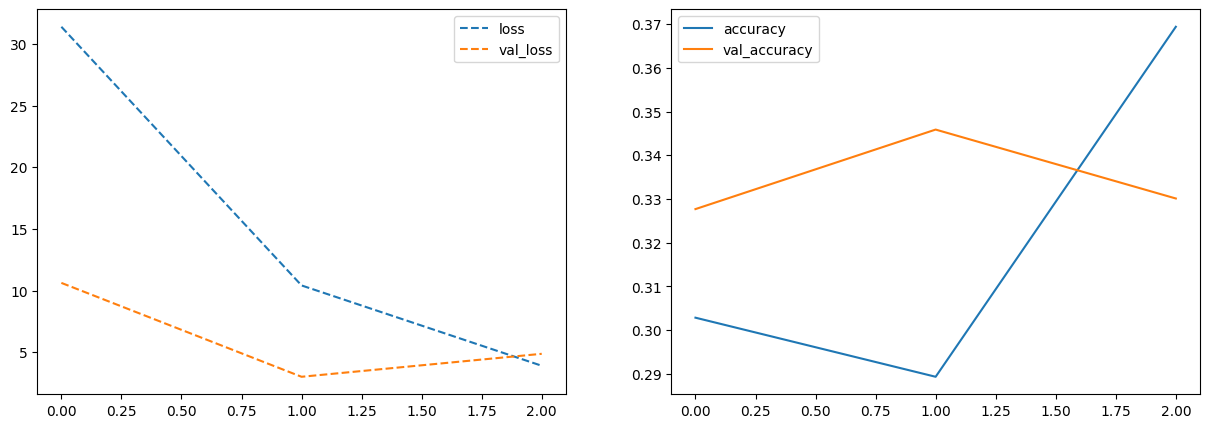

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_history[['loss', 'val_loss']].plot(ax=axes[0], ls='dashed')
df_history[['accuracy', 'val_accuracy']].plot(ax=axes[1])
plt.show()

> #### <b style="color: #58a491">Dropout & BatchNormalization</b>  
> - 활성화 함수가 적용되기 전 레이어 출력에 대해 배치 정규화 수행 =>  활성화 생략 & 활성화 레이어 별도 추가
> - center=True 레이어에 편향(b)이 필요없다
> - 스케일 분련인 활성화 함수는 scale=False (relu가 스케일 불변)

In [94]:
def train_and_evaluate(
    batch_size = 32,
    l1 = 0,
    l2 = 0.001,
    num_hidden = [64, 16]
):
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)
    layers = [tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))]

    for hno, nodes in enumerate(num_hidden):
        layers.extend([
            tf.keras.layers.Dense(nodes, kernel_regularizer=regularizer, name=f'hidden_dense_{hno}'),
            tf.keras.layers.BatchNormalization(scale=False, center=False, name=f'batchnorm_dense_{hno}'), # relu, bias 있음
            tf.keras.layers.Activation('relu', name=f'relu_dense_{hno}'), # 활성화 레이어
            tf.keras.layers.Dropout(.4, name=f'dropout_dense_{hno}')
        ])
        
    layers.append(
        tf.keras.layers.Dense(5, kernel_regularizer=regularizer, activation='softmax', name='flower_prob')
    )
    
    model = tf.keras.Sequential(layers)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy'],
    )
    
    history = model.fit(
        train_dataset, validation_data=eval_dataset, epochs=10,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
    )
    evaluate_model(model, eval_dataset)
    
    return model, pd.DataFrame(history.history)

In [95]:
model, df_history = train_and_evaluate()

Epoch 1/10


2024-01-23 10:44:25.663595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    193/Unknown - 8s 41ms/step - loss: 1.8596 - accuracy: 0.2737

2024-01-23 10:44:33.879737: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13469268466114013565
2024-01-23 10:44:33.879752: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3011983261988905951
2024-01-23 10:44:33.879760: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 9242547758475145588
2024-01-23 10:44:33.879764: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 11757794768827550450
2024-01-23 10:44:33.879769: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 12571133557119636472
2024-01-23 10:44:33.879775: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1901986499557965672
2024-01-23 10:44:33.953551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:11

193/193 [==============================] - 10s 51ms/step - loss: 1.8596 - accuracy: 0.2737 - val_loss: 1.6120 - val_accuracy: 0.3301
Epoch 2/10
  3/193 [..............................] - ETA: 7s - loss: 1.6709 - accuracy: 0.3333

2024-01-23 10:44:35.776408: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13486925027655364983
2024-01-23 10:44:35.776423: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6761118398821464739
2024-01-23 10:44:35.776427: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1087825059296306887
2024-01-23 10:44:35.776437: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10658612884395189640


193/193 [==============================] - 9s 48ms/step - loss: 1.5538 - accuracy: 0.4053 - val_loss: 1.6473 - val_accuracy: 0.3774
Epoch 3/10
193/193 [==============================] - 9s 48ms/step - loss: 1.3689 - accuracy: 0.4964 - val_loss: 1.6653 - val_accuracy: 0.3325
Epoch 4/10
193/193 [==============================] - 9s 49ms/step - loss: 1.2333 - accuracy: 0.5843 - val_loss: 1.5586 - val_accuracy: 0.3617
Epoch 5/10
193/193 [==============================] - 9s 49ms/step - loss: 1.1278 - accuracy: 0.6457 - val_loss: 1.6401 - val_accuracy: 0.3495
Epoch 6/10
193/193 [==============================] - 9s 48ms/step - loss: 1.0728 - accuracy: 0.6878 - val_loss: 1.6893 - val_accuracy: 0.3665
Epoch 7/10
83/83 [==============================] - 2s 21ms/step - loss: 1.6031 - accuracy: 0.3726
loss: 1.6030914783477783, accuracy: 0.37257280945777893


2024-01-23 10:45:33.568459: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13486925027655364983
2024-01-23 10:45:33.568472: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6761118398821464739
2024-01-23 10:45:33.568476: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 1087825059296306887
2024-01-23 10:45:33.568480: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 10658612884395189640


In [96]:
CLASS_NAMES

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']